In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
################################################
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score,KFold

C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('c://Users/amras/Desktop/Dataset/BlackFriDay/BlackFriday.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Preprocessing

In [5]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
# remove missing values
data.dropna(inplace=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


## Label Binarizer on Age Column

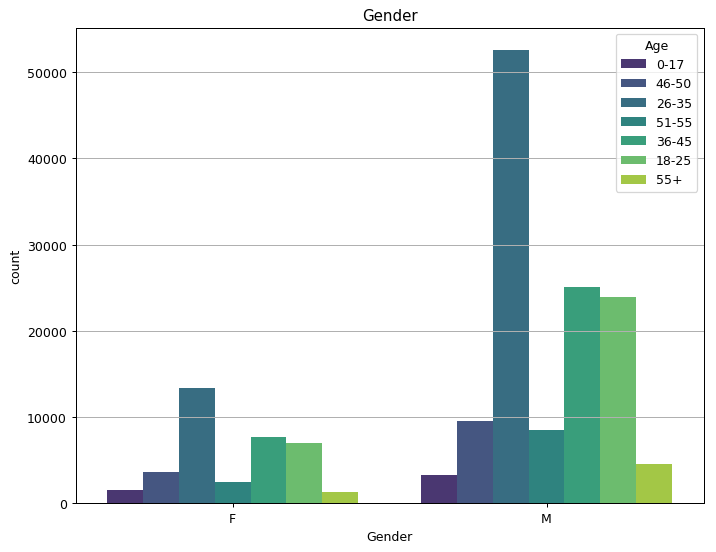

In [7]:
plt.figure(figsize=(9, 7), dpi=90)
plt.grid()
plt.title("Gender")
sns.countplot(x='Gender', data=data,hue='Age', palette='viridis')

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
lb = LabelBinarizer()

In [10]:
data['Gender'] = lb.fit_transform(data['Gender'])

In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,1,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,0,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,0,51-55,9,A,1,0,2,3.0,4.0,13055


In [12]:
data['City_Category'].value_counts()

B    68185
C    55245
A    40848
Name: City_Category, dtype: int64

## Convert City Category to Binarizer 

##### A = 0
#### B = 1
#### C = 2


In [13]:
def convert_to_binary(c):
    if c == 'A':
        return 0
    elif c == 'B':
        return 1 
    elif c == 'C':
        return 2 

In [14]:
data['City_Category'] = data['City_Category'].apply(convert_to_binary)

In [15]:
data['City_Category'].value_counts()

1    68185
2    55245
0    40848
Name: City_Category, dtype: int64

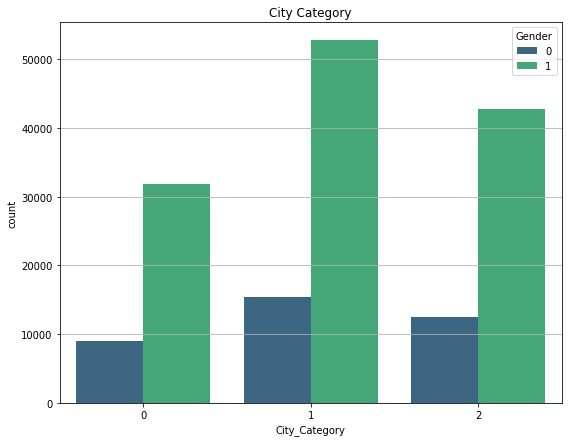

In [16]:
plt.figure(figsize=(9, 7))
plt.grid()
plt.title("City Category")
sns.countplot(x='City_Category', hue='Gender', data=data, palette='viridis')

In [17]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0,15200
6,1000004,P00184942,1,46-50,7,1,2,1,1,8.0,17.0,19215
13,1000005,P00145042,1,26-35,20,0,1,1,1,2.0,5.0,15665
14,1000006,P00231342,0,51-55,9,0,1,0,5,8.0,14.0,5378
16,1000006,P0096642,0,51-55,9,0,1,0,2,3.0,4.0,13055


## Remove User_ID, Product_ID

In [18]:
data.drop(labels=['User_ID', 'Product_ID'], axis=1, inplace=True)

In [19]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,0-17,10,0,2,0,1,6.0,14.0,15200
6,1,46-50,7,1,2,1,1,8.0,17.0,19215
13,1,26-35,20,0,1,1,1,2.0,5.0,15665
14,0,51-55,9,0,1,0,5,8.0,14.0,5378
16,0,51-55,9,0,1,0,2,3.0,4.0,13055


In [20]:
def remove_p(c):
    if c == '4+':
        return 4
    elif c == '0':
        return 0
    elif c == '1':
        return 1
    elif c == '2':
        return 2
    elif c == '3':
        return 3

In [21]:
data['Stay_In_Current_City_Years'].value_counts()

1     57297
2     31040
3     28886
4+    24994
0     22061
Name: Stay_In_Current_City_Years, dtype: int64

In [22]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(remove_p)

In [23]:
data['Stay_In_Current_City_Years'].value_counts()

1    57297
2    31040
3    28886
4    24994
0    22061
Name: Stay_In_Current_City_Years, dtype: int64

In [24]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,0-17,10,0,2,0,1,6.0,14.0,15200
6,1,46-50,7,1,2,1,1,8.0,17.0,19215
13,1,26-35,20,0,1,1,1,2.0,5.0,15665
14,0,51-55,9,0,1,0,5,8.0,14.0,5378
16,0,51-55,9,0,1,0,2,3.0,4.0,13055


## Scale DataSet

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
x = data[['Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
y = data[['Age']]

In [28]:
x = sc.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.33)

# Create Model

In [30]:
models   = []
accuracy = []
names    = []

In [31]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Exta', ExtraTreesClassifier()))

In [32]:
for name, model in models:
    kfold = KFold(n=10,random_state=7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    accuracy.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amras\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

KNN: 0.194444 (0.141639)
SVM: 0.277778 (0.207870)
GaussianNB: 0.388889 (0.078567)
Random Forest: 0.361111 (0.306816)
Decision Tree: 0.388889 (0.078567)
Logistic Regression: 0.083333 (0.117851)
LDA: 0.500000 (0.136083)
Exta: 0.194444 (0.141639)


C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


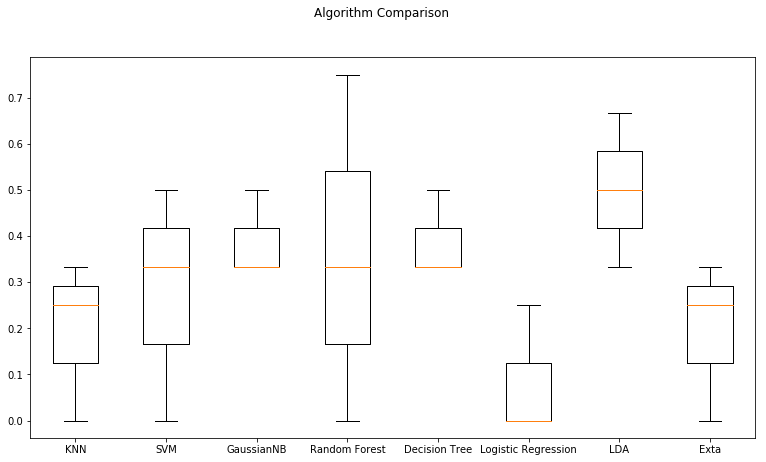

In [33]:
fig = plt.figure(figsize=(13,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

# Create RFC

In [34]:
rfc = RandomForestClassifier()

In [35]:
rfc.fit(x_train, y_train)

C:\Users\amras\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
y_pred = rfc.predict(x_test)

In [37]:
print("Confusion Matrix :\n")
print(confusion_matrix(y_test, y_pred))
print()
print("Classifiction Report :\n")
print(classification_report(y_test, y_pred))
print()
print("Accuracy :{0:.2f}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix :

[[ 1275   131   165    73     2     2     5]
 [  179  6218  2626   823   179   153    61]
 [   94  2734 14383  2732   878   626   263]
 [   85   913  3661  4992   542   468   179]
 [   12   256  1318   639  1640   295   107]
 [    4   209  1167   610   320  1173   127]
 [    3   109   572   278   120   154   657]]

Classifiction Report :

             precision    recall  f1-score   support

       0-17       0.77      0.77      0.77      1653
      18-25       0.59      0.61      0.60     10239
      26-35       0.60      0.66      0.63     21710
      36-45       0.49      0.46      0.48     10840
      46-50       0.45      0.38      0.41      4267
      51-55       0.41      0.32      0.36      3610
        55+       0.47      0.35      0.40      1893

avg / total       0.55      0.56      0.55     54212


Accuracy :0.56
